# **Question 3: Loan Application Modeling**

Heroku Model Deploy link: https://modelprediction16.herokuapp.com/

### Problem Statement

The objective of this study is to predict if a person's loan application will be accepted or rejected based on their details.  

### 1. Data Collection

The data that will be used is the 'Bank_CreditScoring.csv' file. 

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

In [2]:
#Read csv file
df = pd.read_csv('Bank_CreditScoring.csv')
df.head()

,Credit_Card_Exceed_Months,Employment_Type,Loan_Amount,Loan_Tenure_Year,More_Than_One_Products,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,...,Number_of_Loan_to_Approve,Property_Type,Years_for_Property_to_Completion,State,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Decision,Score
0,1,employer,456509,16,yes,1,2,5,2,2,...,1,condominium,10,Johor,2,12262,853141,16025,Reject,7
1,1,employer,605505,19,no,1,2,5,2,2,...,2,condominium,10,Johor,2,9251,882901,17082,Accept,9
2,1,employer,294133,19,yes,1,2,5,2,2,...,3,condominium,10,Johor,2,4919,540489,12613,Reject,8
3,1,employer,490216,20,no,1,2,5,2,2,...,1,condominium,10,Johor,1,4459,536727,10952,Accept,9
4,1,employer,292728,14,yes,1,2,5,2,2,...,2,condominium,10,Johor,3,5628,774695,11209,Reject,8


Next step is to understand the data.

In [3]:
#Preview data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Credit_Card_Exceed_Months          2350 non-null   int64 
 1   Employment_Type                    2350 non-null   object
 2   Loan_Amount                        2350 non-null   int64 
 3   Loan_Tenure_Year                   2350 non-null   int64 
 4   More_Than_One_Products             2350 non-null   object
 5   Credit_Card_More_Than_Months       2350 non-null   int64 
 6   Number_of_Dependents               2350 non-null   int64 
 7   Years_to_Financial_Freedom         2350 non-null   int64 
 8   Number_of_Credit_Card_Facility     2350 non-null   int64 
 9   Number_of_Properties               2350 non-null   int64 
 10  Number_of_Bank_Products            2350 non-null   int64 
 11  Number_of_Loan_to_Approve          2350 non-null   int64 
 12  Proper

The data has 2350 rows and 21 columns. There are 16 columns with int64 data type and 5 columns with object data type. 

In [4]:
#Print each of the columns with its unique values in the column and the data type of the column
for x in df.columns:
    print(x)
    print('Unique classes:', df[x].unique())
    print('Data type:', df[x].dtypes, '\n')

Credit_Card_Exceed_Months
Unique classes: [1 6 2 7 3 4 5]
Data type: int64 

Employment_Type
Unique classes: ['employer' 'Self_Employed' 'government' 'employee' 'Fresh_Graduate']
Data type: object 

Loan_Amount
Unique classes: [456509 605505 294133 ... 321921 393555 270677]
Data type: int64 

Loan_Tenure_Year
Unique classes: [16 19 20 14 11 22 21 24 12 10 23 13 18 15 17]
Data type: int64 

More_Than_One_Products
Unique classes: ['yes' 'no']
Data type: object 

Credit_Card_More_Than_Months
Unique classes: [1 2 3 4 5]
Data type: int64 

Number_of_Dependents
Unique classes: [2 3 4 5 6]
Data type: int64 

Years_to_Financial_Freedom
Unique classes: [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Data type: int64 

Number_of_Credit_Card_Facility
Unique classes: [2 6 5 4 3]
Data type: int64 

Number_of_Properties
Unique classes: [2 3 4 5]
Data type: int64 

Number_of_Bank_Products
Unique classes: [1 2 3 5 4]
Data type: int64 

Number_of_Loan_to_Approve
Unique classes: [1 2 3]
Data type: int64 

Based on the information above, the variables with data type 'object' are categorical variables. The rest of the variables with data type 'int64' are numerical variables.

Categorical variables: 'Employment_Type', 'More_Than_One_Products', 'Property_Type', 'State', 'Decision'
       
Numerical variables: 'Credit_Card_Exceed_Months', 'Loan_Amount', 'Loan_Tenure_Year', 'Credit_Card_More_Than_Months', 'Number_of_Dependents', 'Years_to_Financial_Freedom', 'Number_of_Credit_Card_Facility', 'Number_of_Properties', 'Number_of_Bank_Products', 'Number_of_Loan_to_Approve', 'Years_for_Property_to_Completion', 'Number_of_Side_Income', 'Monthly_Salary', 'Total_Sum_of_Loan', 'Total_Income_for_Join_Application', 'Score'

### 2. Data Preprocessing

In this section, we will be transforming raw data into a more understandable format which can be useful for data exploration and data modeling.

### Data Cleaning

#### Identifying incomplete data

In [5]:
#Checking missing values
df.isnull().sum()

Credit_Card_Exceed_Months            0
Employment_Type                      0
Loan_Amount                          0
Loan_Tenure_Year                     0
More_Than_One_Products               0
Credit_Card_More_Than_Months         0
Number_of_Dependents                 0
Years_to_Financial_Freedom           0
Number_of_Credit_Card_Facility       0
Number_of_Properties                 0
Number_of_Bank_Products              0
Number_of_Loan_to_Approve            0
Property_Type                        0
Years_for_Property_to_Completion     0
State                                0
Number_of_Side_Income                0
Monthly_Salary                       0
Total_Sum_of_Loan                    0
Total_Income_for_Join_Application    0
Decision                             0
Score                                0
dtype: int64

Based on the code above, it can be seen that there are no missing values found.

### Data transformation

#### Ensuring categorical values are unique

In [6]:
#Print all the categorical values with the number of unique classes and the name of the unique class
categorical_col = [col for col in df.columns if col not in df.describe().columns]
for col in categorical_col:
    print('Column name:',col,'\n','Number of classes:',df[col].nunique(),'\n','Classes:',df[col].unique(),'\n')

Column name: Employment_Type 
 Number of classes: 5 
 Classes: ['employer' 'Self_Employed' 'government' 'employee' 'Fresh_Graduate'] 

Column name: More_Than_One_Products 
 Number of classes: 2 
 Classes: ['yes' 'no'] 

Column name: Property_Type 
 Number of classes: 4 
 Classes: ['condominium' 'bungalow' 'terrace' 'flat'] 

Column name: State 
 Number of classes: 15 
 Classes: ['Johor' 'Selangor' 'Kuala Lumpur' 'Penang' 'P.Pinang' 'Pulau Penang'
 'Johor B' 'K.L' 'N.Sembilan' 'N.S' 'Sarawak' 'Sabah' 'SWK' 'Trengganu'
 'Kedah'] 

Column name: Decision 
 Number of classes: 2 
 Classes: ['Reject' 'Accept'] 



Based on the code above, the 'State' column has some repetitive categories. Let's convert these repetitive categories as unique categories.

In [7]:
#Convert these repetitive categories as unique categories
df['State'] = df['State'].replace(['Johor B','K.L','P.Pinang','Pulau Penang','N.S','SWK'], ['Johor','Kuala Lumpur','Penang','Penang','N.Sembilan','Sarawak'])

### 3. Exploratory Data Analysis

#### Description of the Dataset

In this section, we will be exploring the dataset to obtain descriptive statistics, understand the characteristics of the dataset and identify the patterns and relationships between variables.

#### Descriptive Statistics

In this section, we will be performing descriptive statistics to view basic statistical details such as mean, standard deviation, minimum, maximum and etc.

In [8]:
#View the statistical details such as mean, standard deviation, minimum, maximum and etc
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Years_to_Financial_Freedom,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,Number_of_Side_Income,Monthly_Salary,Total_Sum_of_Loan,Total_Income_for_Join_Application,Score
count,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00,2350.00
mean,4.72,448350.12,17.05,2.13,3.13,13.38,3.74,2.38,2.11,1.99,10.66,2.02,7972.04,943575.64,13767.86,7.50
std,2.10,202814.89,4.35,1.41,1.41,4.07,1.39,0.81,1.53,0.82,1.08,0.82,2588.33,290903.35,3591.71,1.11
min,1.00,100194.00,10.00,1.00,2.00,5.00,2.00,2.00,1.00,1.00,10.00,1.00,3583.00,420239.00,7523.00,6.00
25%,3.00,273169.25,13.00,1.00,2.00,10.00,2.00,2.00,1.00,1.00,10.00,1.00,5737.75,700787.00,10751.50,6.00
50%,5.00,447251.50,17.00,1.00,2.00,14.00,4.00,2.00,1.00,2.00,10.00,2.00,7982.50,937527.50,13689.50,8.00
75%,7.00,623714.00,21.00,3.00,4.00,17.00,5.00,2.00,3.00,3.00,11.00,3.00,10227.75,1197191.00,16916.25,8.00
max,7.00,799628.00,24.00,5.00,6.00,19.00,6.00,5.00,5.00,3.00,13.00,3.00,12562.00,1449960.00,19995.00,9.00


Based on the descriptive statistics above, the standard deviation is high among columns such as 'Loan_Amount', 'Monthly_Salary', 'Total_Sum_of_Loan', 'Total_Income_for_Join_Application'. 

Moreover, the maximum value for column 'Loan_Amount', 'Loan_Tenure_Year', 'Years_to_Financial_Freedom', 'Total_Sum_of_Loan' is relatively high. 

Thus, further investigation using data visualization is required to identify if there are any outliers.

#### Data Visualization 

In this section, we will be plotting charts and diagrams to understand the characteristics of the variables in the dataset and identify any relations between the variables.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Univariate Analysis  (Categorical Variable)

<AxesSubplot:title={'center':'State'}>

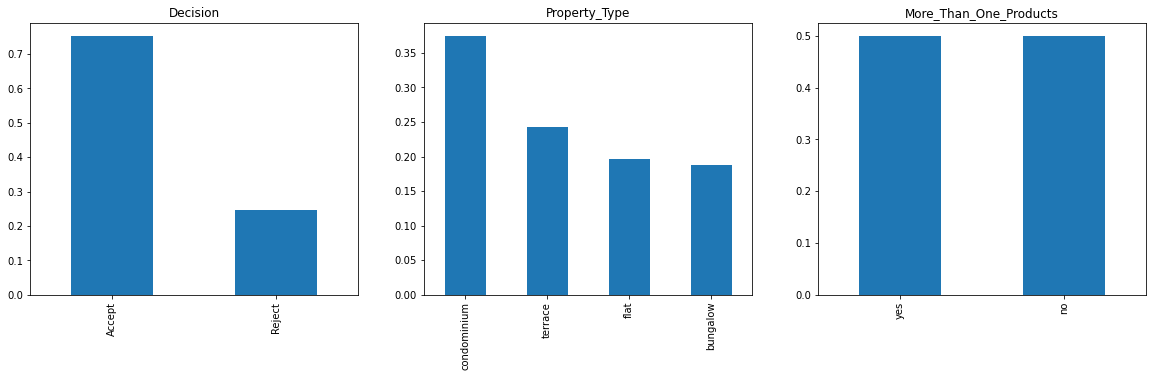

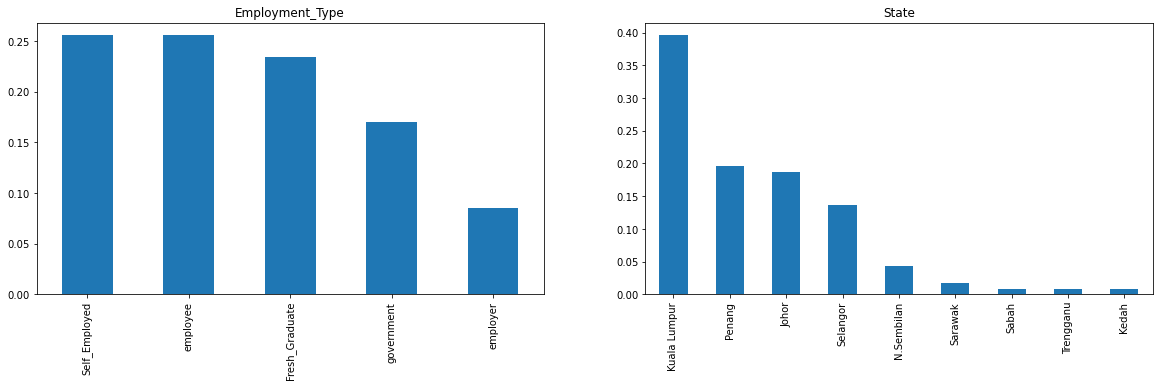

In [10]:
#Create a figure and axes
fix,ax = plt.subplots(1,3,figsize=(20,5))

#Plot bar chart for the categorical variables
#Normalize can be set to True to print proportions instead of number 
df["Decision"].value_counts(normalize=True).plot.bar(title = 'Decision',ax=ax[0])
df["Property_Type"].value_counts(normalize=True).plot.bar(title = 'Property_Type',ax=ax[1])
df["More_Than_One_Products"].value_counts(normalize=True).plot.bar(title = 'More_Than_One_Products',ax=ax[2])

#Create a figure and axes
fix1,ax1 = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart for the categorical variables
#Normalize can be set to True to print proportions instead of number 
df["Employment_Type"].value_counts(normalize=True).plot.bar(title = 'Employment_Type',ax=ax1[0])
df["State"].value_counts(normalize=True).plot.bar(title = 'State',ax=ax1[1])

Based on the univariate analysis above for categorical variables:

1. 'Decision' variable - 1769 people (around 75%) people out of 2350 were accepted. <br>
2. 'Property_Type' variable - 'Condominium' has the highest value (close to 40%) among the rest.<br>
3. 'More_Than_One_Products' variable - Approximately the same amount of value for 'Yes' and 'No' (around 50%). 
4. 'Employment_Type' variable - 'Self-employed' and 'Employee' has the highest value (around 25%). <br>
5. 'State' variable - 'Kuala Lumpur' has the highest value (close to 40%) among the rest.


#### Univariate Analysis  (Numerical Variable)

<AxesSubplot:>

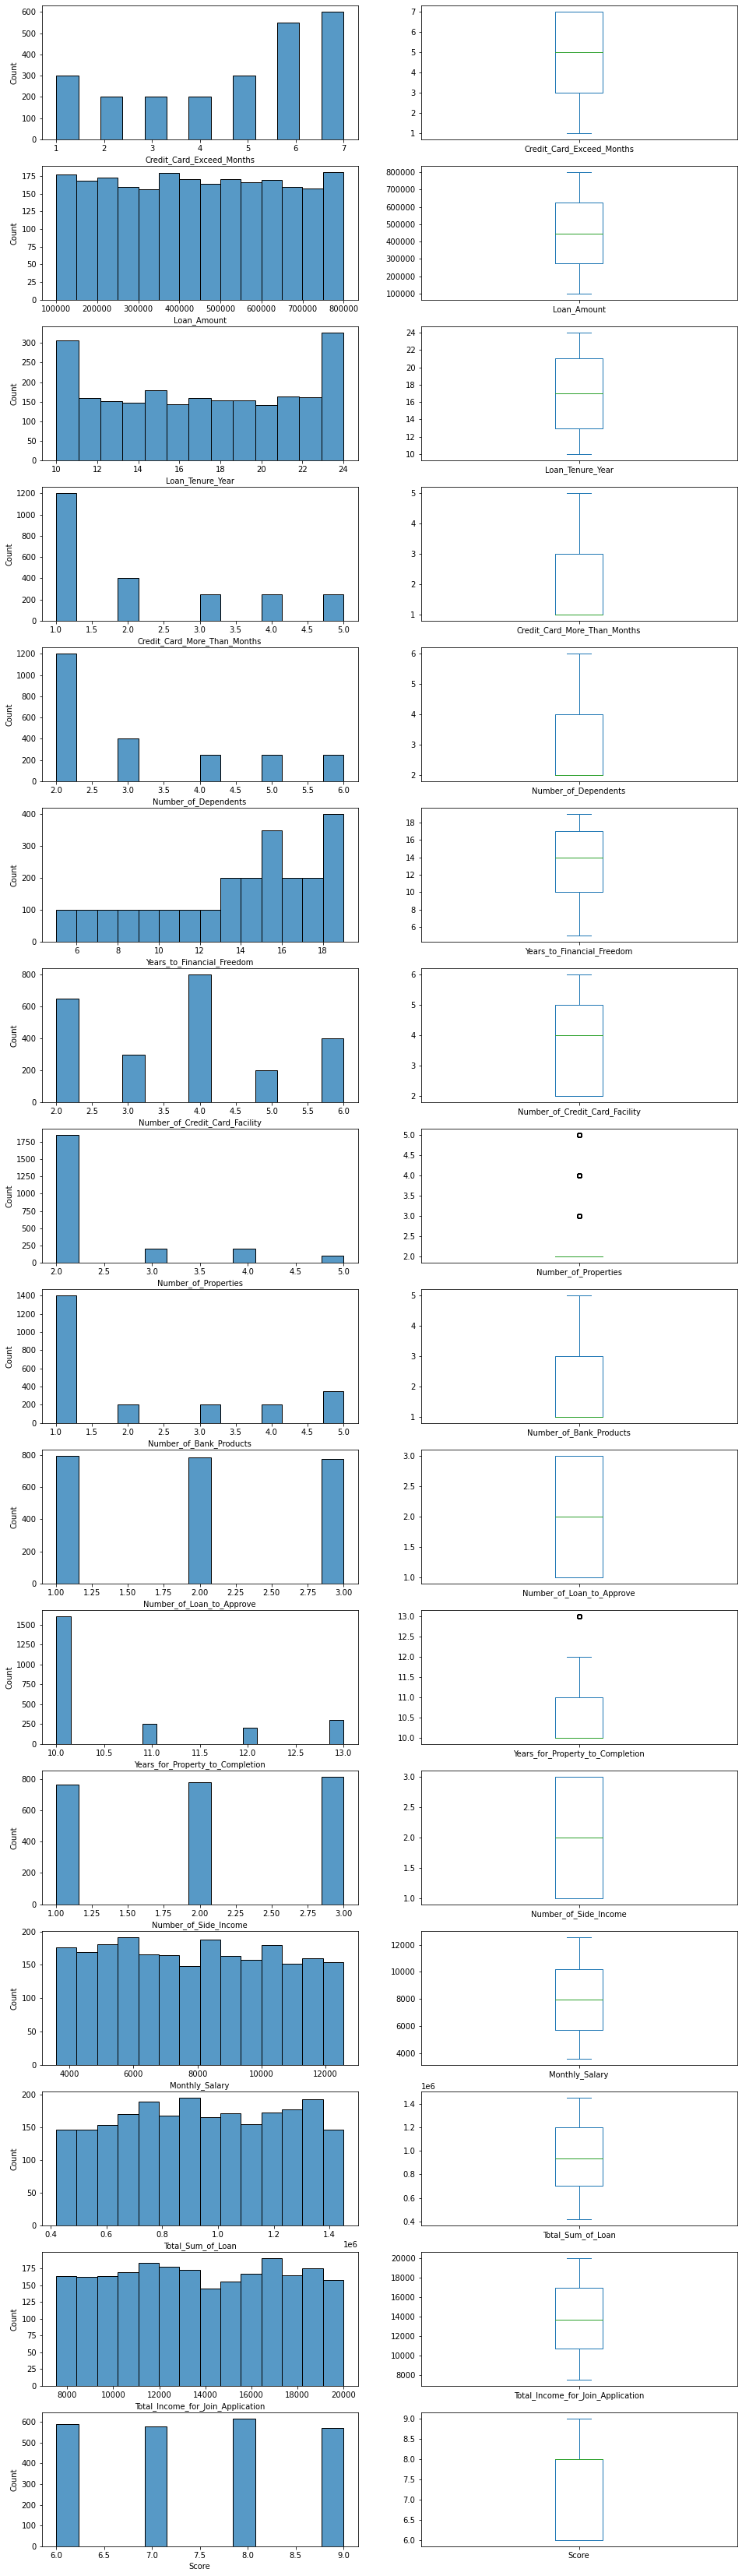

In [11]:
#Create a figure and axes
fix1,ax1 = plt.subplots(16,2,figsize=(16,60))

#Plot histogram for the numerical variables
sns.histplot(df["Credit_Card_Exceed_Months"],ax=ax1[0][0])
df["Credit_Card_Exceed_Months"].plot.box(ax=ax1[0][1])

sns.histplot(df["Loan_Amount"],ax=ax1[1][0])
df["Loan_Amount"].plot.box(ax=ax1[1][1])

sns.histplot(df["Loan_Tenure_Year"],ax=ax1[2][0])
df["Loan_Tenure_Year"].plot.box(ax=ax1[2][1])

sns.histplot(df["Credit_Card_More_Than_Months"],ax=ax1[3][0])
df["Credit_Card_More_Than_Months"].plot.box(ax=ax1[3][1])

sns.histplot(df["Number_of_Dependents"],ax=ax1[4][0])
df["Number_of_Dependents"].plot.box(ax=ax1[4][1])

sns.histplot(df["Years_to_Financial_Freedom"],ax=ax1[5][0])
df["Years_to_Financial_Freedom"].plot.box(ax=ax1[5][1])

sns.histplot(df["Number_of_Credit_Card_Facility"],ax=ax1[6][0])
df["Number_of_Credit_Card_Facility"].plot.box(ax=ax1[6][1])

sns.histplot(df["Number_of_Properties"],ax=ax1[7][0])
df["Number_of_Properties"].plot.box(ax=ax1[7][1])

sns.histplot(df["Number_of_Bank_Products"],ax=ax1[8][0])
df["Number_of_Bank_Products"].plot.box(ax=ax1[8][1])

sns.histplot(df["Number_of_Loan_to_Approve"],ax=ax1[9][0])
df["Number_of_Loan_to_Approve"].plot.box(ax=ax1[9][1])

sns.histplot(df["Years_for_Property_to_Completion"],ax=ax1[10][0])
df["Years_for_Property_to_Completion"].plot.box(ax=ax1[10][1])

sns.histplot(df["Number_of_Side_Income"],ax=ax1[11][0])
df["Number_of_Side_Income"].plot.box(ax=ax1[11][1])

sns.histplot(df["Monthly_Salary"],ax=ax1[12][0])
df["Monthly_Salary"].plot.box(ax=ax1[12][1])

sns.histplot(df["Total_Sum_of_Loan"],ax=ax1[13][0])
df["Total_Sum_of_Loan"].plot.box(ax=ax1[13][1])

sns.histplot(df["Total_Income_for_Join_Application"],ax=ax1[14][0])
df["Total_Income_for_Join_Application"].plot.box(ax=ax1[14][1])

sns.histplot(df["Score"],ax=ax1[15][0])
df["Score"].plot.box(ax=ax1[15][1])


Based on the univariate analysis above for numerical variables, we are able to deduce two information:

1. Distribution of the variable based on the histogram <br> <br>
     a. The distribution is uniform and continuous for 'Loan_Amount', 'Monthly_Salary', 'Total_Sum_of_Loan' and 'Total_Income_for_Join_Application' variable. <br> <br>
     b. The distribution is discrete for 'Credit_Card_Exceed_Months', 'Loan_Tenure_Year', 'Credit_Card_More_Than_Months', 'Number_of_Dependents', 'Years_to_Financial_Freedom', 'Number_of_Credit_Card_Facility', 'Number_of_Properties', 'Number_of_Bank_Products', 'Number_of_Loan_to_Approve', 'Years_for_Property_to_Completion', 'Number_of_Side_Income', 'Score' variable. <br> <br>
     
2. Outlier of the variable based on the boxplot <br> <br>
   a. There is only one variable with an outlier which is 'Years_for_Property_to_Completion' variable with an outlier of value '13'. However, when further exploring the histogram, there is approximately 250 counts for the value '13'. Hence, the outlier can be retained.
   


#### Bivariate Analysis 

In this section, we will be performing bivariate analysis to see if there are any strong correlation between the target variables (Decision) and the other existing variables.

<AxesSubplot:title={'center':'State'}, xlabel='State'>

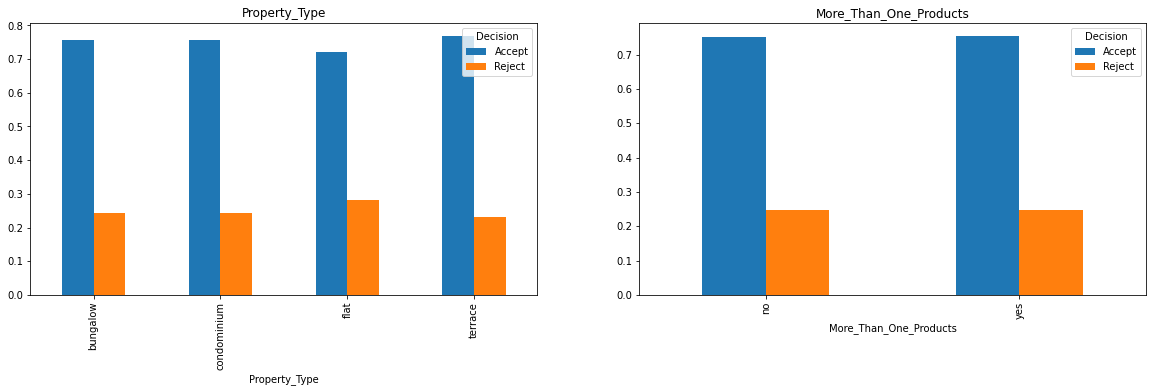

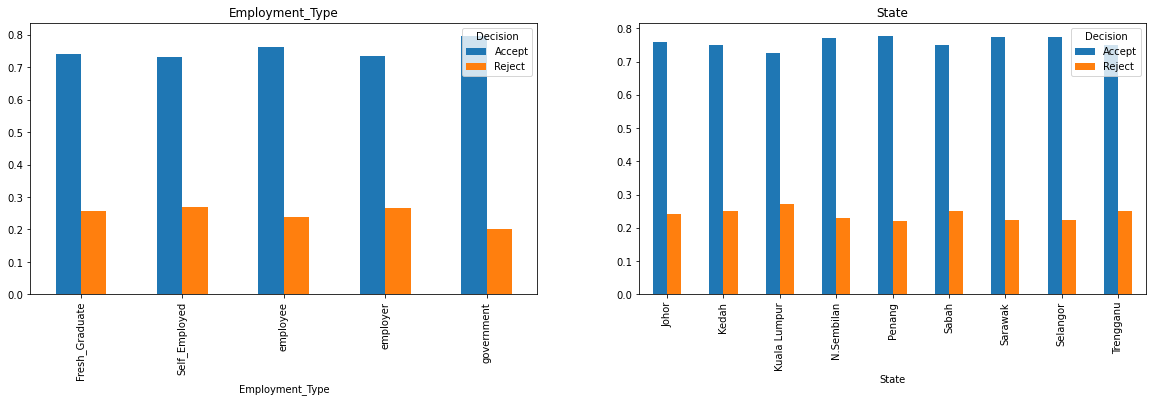

In [12]:
#Create a figure and axes
fix,ax = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Property_Type")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Property_Type',ax=ax[0])
df.groupby("More_Than_One_Products")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'More_Than_One_Products',ax=ax[1])

#Create a figure and axes
fix1,ax1 = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Employment_Type")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Employment_Type',ax=ax1[0])
df.groupby("State")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'State',ax=ax1[1])

Based on the above barplot:

1. 'Property_Type' variable - Proportion of 'Terrace' is higher for the accepted loans. <br>
2. 'More_Than_One_Products' variable - Proportion of 'Yes' and 'No' are approximately equal for the accepted loans. <br>  
3. 'Employment_Type' variable - Proportion of 'Government' is higher for the accepted loans. <br>
4. 'State' variable - Proportion of 'Penang','Sarawak' and 'Selangor' is higher for the accepted loans.

<AxesSubplot:title={'center':'Number_of_Dependents'}, xlabel='Number_of_Dependents'>

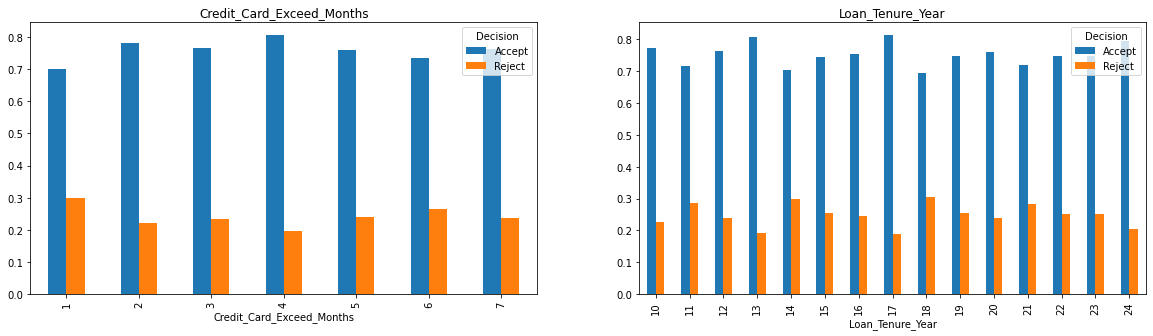

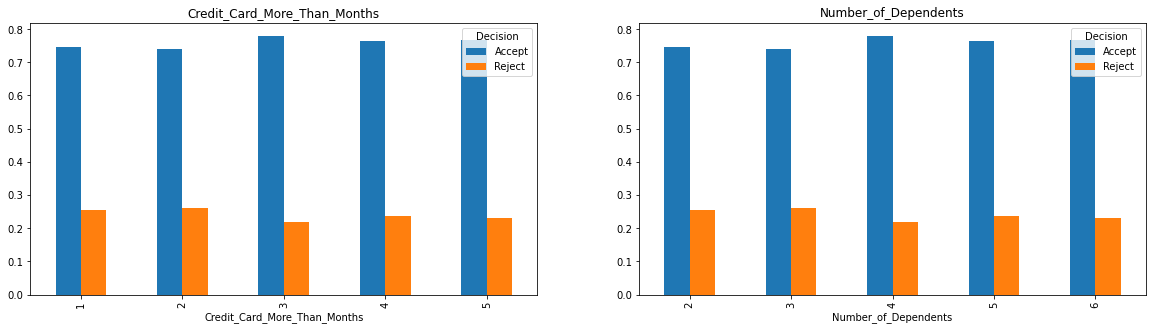

In [13]:
#Create a figure and axes
fix,ax = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Credit_Card_Exceed_Months")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Credit_Card_Exceed_Months',ax=ax[0])
df.groupby("Loan_Tenure_Year")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Loan_Tenure_Year',ax=ax[1])

#Create a figure and axes
fix1,ax1 = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Credit_Card_More_Than_Months")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Credit_Card_More_Than_Months',ax=ax1[0])
df.groupby("Number_of_Dependents")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Number_of_Dependents',ax=ax1[1])

Based on the above barplot:

1. 'Credit_Card_Exceed_Months' variable - Proportion of value '4' is higher for the accepted loans. <br>
2. 'Loan_Tenure_Year' variable - Proportion of value '17' is higher for the accepted loans. <br>  
3. 'Credit_Card_More_Than_Months' variable - Proportion of value '3' is higher for the accepted loans. <br>
4. 'Number_of_Dependents' variable - Proportion of value '4' is higher for the accepted loans.

<AxesSubplot:title={'center':'Number_of_Bank_Products'}, xlabel='Number_of_Bank_Products'>

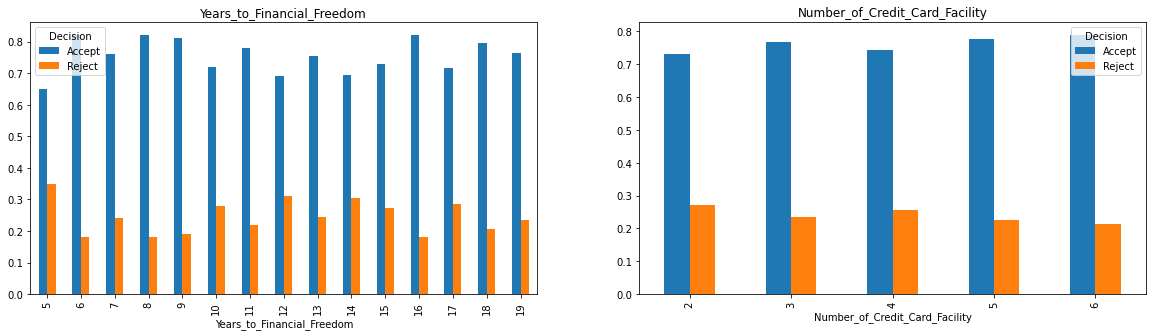

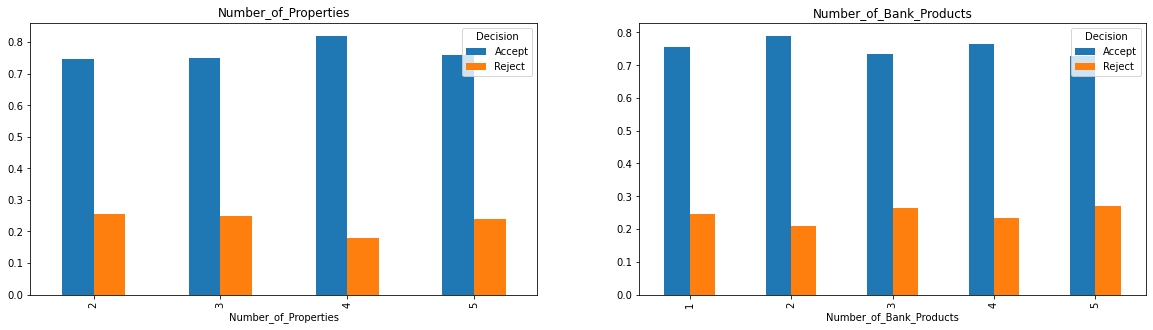

In [14]:
#Create a figure and axes
fix,ax = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Years_to_Financial_Freedom")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Years_to_Financial_Freedom',ax=ax[0])
df.groupby("Number_of_Credit_Card_Facility")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Number_of_Credit_Card_Facility',ax=ax[1])

#Create a figure and axes
fix1,ax1 = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Number_of_Properties")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Number_of_Properties',ax=ax1[0])
df.groupby("Number_of_Bank_Products")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Number_of_Bank_Products',ax=ax1[1])

Based on the above barplot:

1. 'Years_to_Financial_Freedom' variable - Proportion of value '6','8' and '16' is higher for the accepted loans. <br>
2. 'Number_of_Credit_Card_Facility' variable - Proportion of value '6' is higher for the accepted loans. <br>  
3. 'Number_of_Properties' variable - Proportion of value '4' is higher for the accepted loans. <br>
4. 'Number_of_Bank_Products' variable - Proportion of value '2' is higher for the accepted loans.

<AxesSubplot:title={'center':'Score'}, xlabel='Score'>

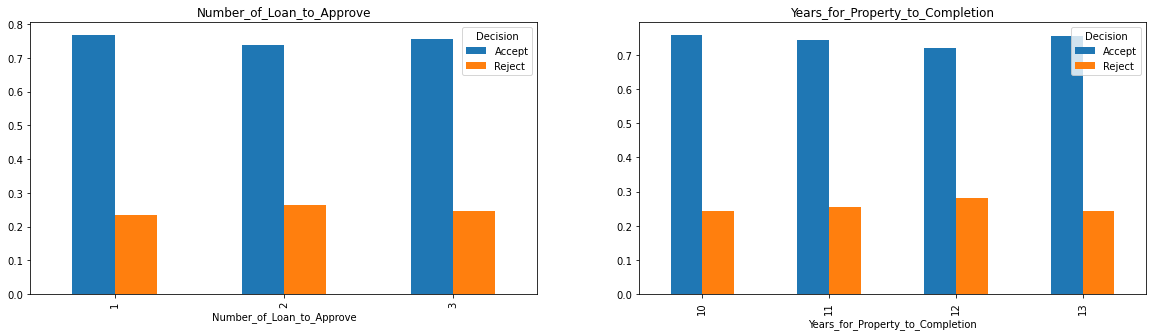

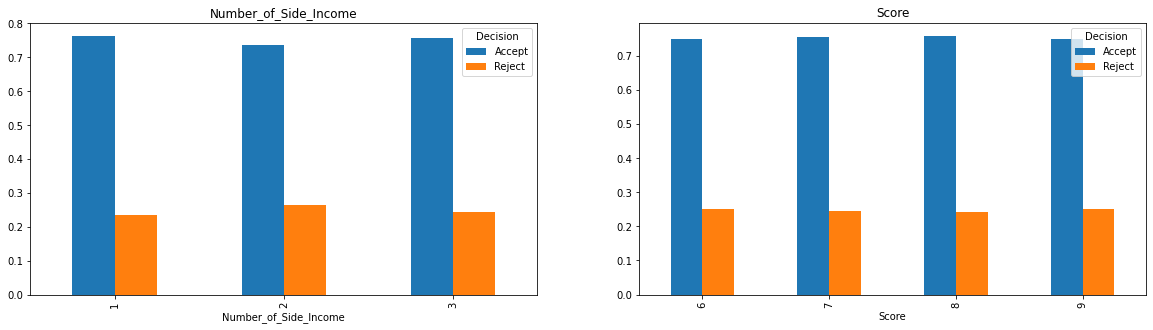

In [15]:
#Create a figure and axes
fix,ax = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Number_of_Loan_to_Approve")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Number_of_Loan_to_Approve',ax=ax[0])
df.groupby("Years_for_Property_to_Completion")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Years_for_Property_to_Completion',ax=ax[1])

#Create a figure and axes
fix1,ax1 = plt.subplots(1,2,figsize=(20,5))

#Plot bar chart
#Normalize can be set to True to print proportions instead of number
df.groupby("Number_of_Side_Income")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Number_of_Side_Income',ax=ax1[0])
df.groupby("Score")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Score',ax=ax1[1])

Based on the above barplot:

1. 'Number_of_Loan_to_Approve' variable - Proportion of value '1' is higher for the accepted loans. <br>
2. 'Years_for_Property_to_Completion' variable - Proportion of value '10' is higher for the accepted loans. <br>  
3. 'Number_of_Side_Income' variable - Proportion of value '1' is higher for the accepted loans. <br>
4. 'Score' variable - Proportion of the values are approximately the same for the accepted loans.

<AxesSubplot:title={'center':'Total_Income_for_Join_Application_Binned'}, xlabel='Total_Income_for_Join_Application_Binned'>

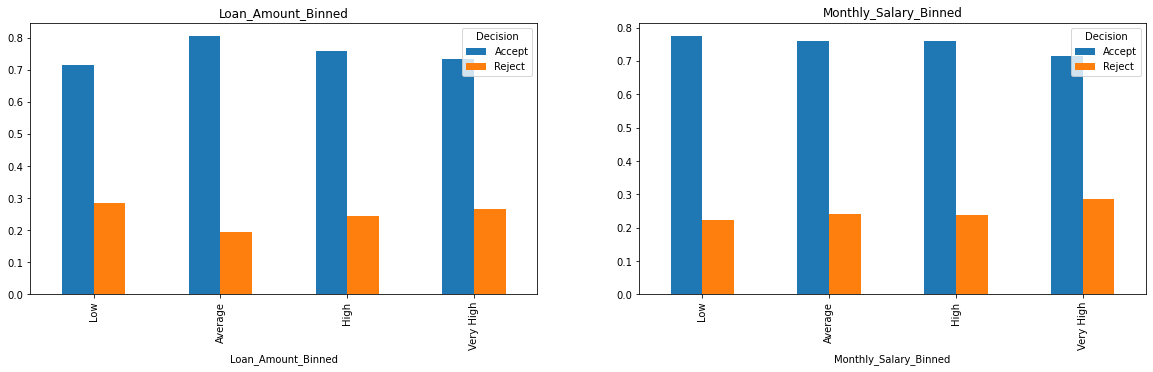

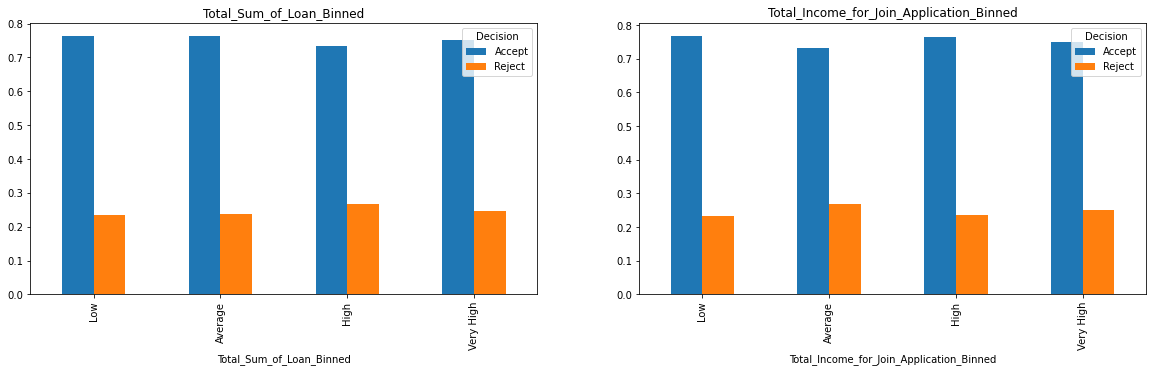

In [16]:
#Create a figure and axes
fix,ax = plt.subplots(1,2,figsize=(20,5))

#Obtain min and max value of loan amount
mn = min(df['Loan_Amount'])
mx = max(df['Loan_Amount'])

#Create 4 equal portions of the value
bins = np.linspace(mn, mx, 5)

#Create name for each portion
group_names = ['Low','Average','High','Very High']

#Bin the data
lmb = df['Loan_Amount']
df['Loan_Amount_Binned'] = pd.cut(lmb, bins, labels=group_names, include_lowest=True)

#Plot a bar graph for binned data
df.groupby("Loan_Amount_Binned")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Loan_Amount_Binned',ax=ax[0])

#Obtain min and max value of monthly salary
mn = min(df['Monthly_Salary'])
mx = max(df['Monthly_Salary'])

#Create 4 equal portions of the value
bins = np.linspace(mn, mx, 5)

#Create name for each portion
group_names = ['Low','Average','High','Very High']

#Bin the data
lmb = df['Monthly_Salary']
df['Monthly_Salary_Binned'] = pd.cut(lmb, bins, labels=group_names, include_lowest=True)

#Plot a bar graph for binned data
df.groupby("Monthly_Salary_Binned")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Monthly_Salary_Binned',ax=ax[1])

#Create a figure and axes
fix1,ax1 = plt.subplots(1,2,figsize=(20,5))

#Obtain min and max value of total sum of loan
mn = min(df['Total_Sum_of_Loan'])
mx = max(df['Total_Sum_of_Loan'])

#Create 4 equal portions of the value
bins = np.linspace(mn, mx, 5)

#Create name for each portion
group_names = ['Low','Average','High','Very High']

#Bin the data
lmb = df['Total_Sum_of_Loan']
df['Total_Sum_of_Loan_Binned'] = pd.cut(lmb, bins, labels=group_names, include_lowest=True)

#Plot a bar graph for binned data
df.groupby("Total_Sum_of_Loan_Binned")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Total_Sum_of_Loan_Binned',ax=ax1[0])

#Obtain min and max value of total income for join application
mn = min(df['Total_Income_for_Join_Application'])
mx = max(df['Total_Income_for_Join_Application'])

#Create 4 equal portions of the value
bins = np.linspace(mn, mx, 5)

#Create name for each portion
group_names = ['Low','Average','High','Very High']

#Bin the data
lmb = df['Total_Income_for_Join_Application']
df['Total_Income_for_Join_Application_Binned'] = pd.cut(lmb, bins, labels=group_names, include_lowest=True)

#Plot a bar graph for binned data
df.groupby("Total_Income_for_Join_Application_Binned")["Decision"].value_counts(normalize=True).unstack('Decision').plot.bar(title = 'Total_Income_for_Join_Application_Binned',ax=ax1[1])

Based on the above barplot:

1. 'Loan_Amount' variable - Proportion of 'Average' is higher for the accepted loans. <br>
2. 'Monthly_Salary' variable - Proportion of 'Low' is higher for the accepted loans. <br>  
3. 'Total_Sum_of_Loan' variable - Proportion of value 'Low' and 'Average' is higher for the accepted loans. <br>
4. 'Total_Income_for_Join_Application' variable - Proportion of 'Low' is higher for the accepted loans.

Finally, we would like to see if there are correlation among other variables apart from the target variable (Decision).

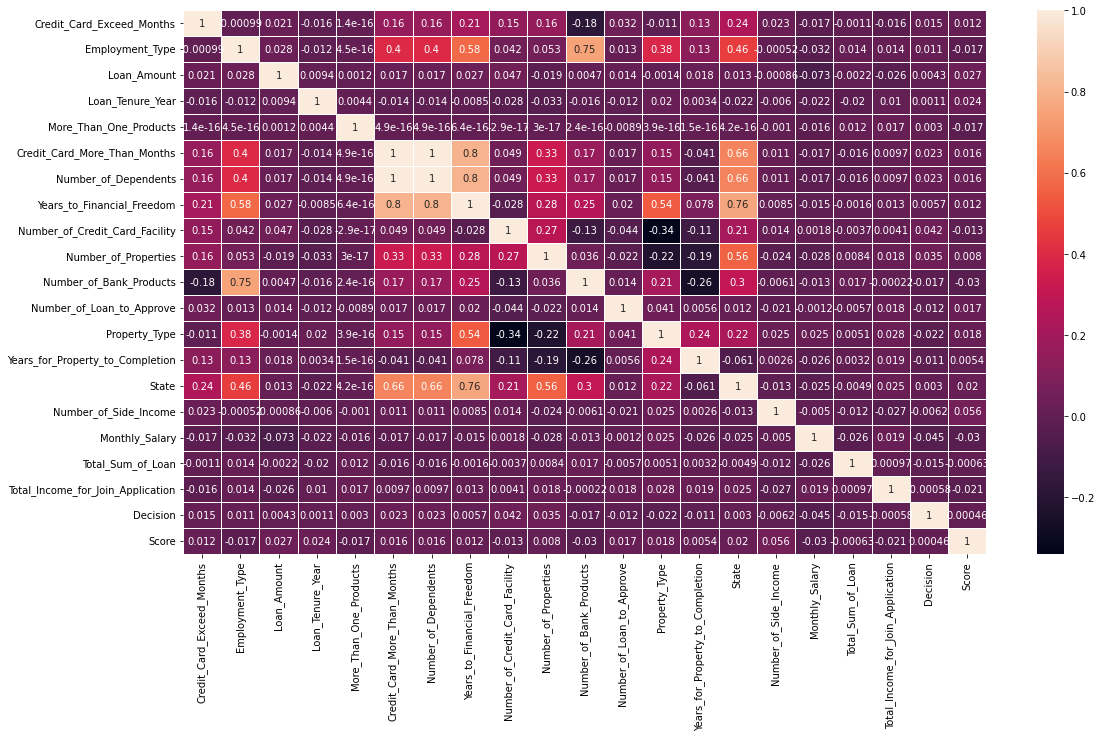

In [17]:
#Create a copy of the data
temp_df = df.copy()

#Perform label encoding for the data so that the variable can be detected by the heatmap
temp_df['Employment_Type'] = temp_df['Employment_Type'].map({'employer':0, 'Self_Employed':1, 'government':2, 'employee':3, 'Fresh_Graduate': 4}).astype('int64')
temp_df['More_Than_One_Products'] = temp_df['More_Than_One_Products'].map({'yes':1, 'no':0}).astype('int64')
temp_df['Property_Type'] = temp_df['Property_Type'].map({'condominium':0, 'bungalow':1,'terrace':2, 'flat':3}).astype('int64')
temp_df['State'] = temp_df['State'].map({'Johor':0, 'Selangor':1, 'Kuala Lumpur':2, 'Penang':3, 'N.Sembilan':4, 'Sarawak':5, 'Sabah':6, 'Trengganu':7, 'Kedah':8}).astype('int64')
temp_df['Decision'] = temp_df['Decision'].map({'Accept':1, 'Reject':0}).astype('int64')

#Create a figure
plt.figure(figsize = (18,10))

#Plot the heatmap
ax = sns.heatmap(temp_df.corr(), annot=True, linewidths=.5)

Based on the heatmap, these are the variables with high correlation: 

1. Employment_Type and Number_of_Bank_Products
2. Number_of_Dependents and Years_to_Financial_Freedom
3. Credit_Card_Exceed_Months and Years_to_Financial_Freedom
4. State and Years_to_Financial_Freedom

It can be observed that Years_to_Financial_Freedom correlates with quite a few other variables.

In [18]:
#Remove the binned columns created earlier for analysis since we are done analyzing
df.drop(['Loan_Amount_Binned', 'Monthly_Salary_Binned',
       'Total_Sum_of_Loan_Binned', 'Total_Income_for_Join_Application_Binned'],axis=1,inplace=True)

### 4. Data Preparation for Model Prediction

In this section, we will be performing some important methods to improve data quality and cleanliness.

The methods are as stated below: 
   1. Binning
   2. One Hot Encoding
   3. Label Encoding
   4. Feature Scaling

#### Binning

Based on the heatmap above, we observed that Years_to_Financial_Freedom correlates with a few other variables. Hence, binning the data could be useful which may help to increase the accuracy during model prediction.

In [19]:
#Obtain min and max value of years to finanicial freedom
mn = min(df['Years_to_Financial_Freedom'])
mx = max(df['Years_to_Financial_Freedom'])

#Create 3 equal portions of the value
bins = np.linspace(mn, mx, 4)

#Create name for each portion
group_names = ['Low', 'Medium', 'High']

#Bin the data
yff = df['Years_to_Financial_Freedom']
df['Years_to_Financial_Freedom'] = pd.cut(yff, bins, labels=group_names, include_lowest=True )

#Label encoding
df['Years_to_Financial_Freedom'] = df['Years_to_Financial_Freedom'].map({'Low':0, 'Medium':1,'High':2}).astype('int64')

df['Years_to_Financial_Freedom'].unique()

array([0, 1, 2], dtype=int64)

#### One Hot Encoding

In [20]:
#Perform pd.get_dummies() to create a column for each unique value in a categorical column
df_pred = pd.get_dummies(df, columns = ['Employment_Type', 'More_Than_One_Products', 'Property_Type', 'State','Years_to_Financial_Freedom'])
df_pred

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,...,State_Kuala Lumpur,State_N.Sembilan,State_Penang,State_Sabah,State_Sarawak,State_Selangor,State_Trengganu,Years_to_Financial_Freedom_0,Years_to_Financial_Freedom_1,Years_to_Financial_Freedom_2
0,1,456509,16,1,2,2,2,1,1,10,...,0,0,0,0,0,0,0,1,0,0
1,1,605505,19,1,2,2,2,1,2,10,...,0,0,0,0,0,0,0,1,0,0
2,1,294133,19,1,2,2,2,1,3,10,...,0,0,0,0,0,0,0,1,0,0
3,1,490216,20,1,2,2,2,1,1,10,...,0,0,0,0,0,0,0,1,0,0
4,1,292728,14,1,2,2,2,1,2,10,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,6,339461,15,2,3,2,2,5,2,11,...,1,0,0,0,0,0,0,0,0,1
2346,6,690944,13,2,3,2,2,5,2,11,...,1,0,0,0,0,0,0,0,0,1
2347,6,321921,13,2,3,2,2,5,2,11,...,1,0,0,0,0,0,0,0,0,1
2348,6,393555,14,2,3,2,2,5,2,11,...,1,0,0,0,0,0,0,0,0,1


#### Label Encoding

In [21]:
#Label encoder for target variable
df_pred['Decision'] = df_pred['Decision'].map({'Accept':0, 'Reject':1}).astype('int64')
df_pred['Decision'].head()

0    1
1    0
2    1
3    0
4    1
Name: Decision, dtype: int64

####  Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#Perform fitting and transforming for the data to standardize the data
sc = MinMaxScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df_pred.drop('Decision',axis=1)), columns=df_pred.drop('Decision',axis=1).columns)
df_scaled

,Credit_Card_Exceed_Months,Loan_Amount,Loan_Tenure_Year,Credit_Card_More_Than_Months,Number_of_Dependents,Number_of_Credit_Card_Facility,Number_of_Properties,Number_of_Bank_Products,Number_of_Loan_to_Approve,Years_for_Property_to_Completion,...,State_Kuala Lumpur,State_N.Sembilan,State_Penang,State_Sabah,State_Sarawak,State_Selangor,State_Trengganu,Years_to_Financial_Freedom_0,Years_to_Financial_Freedom_1,Years_to_Financial_Freedom_2
0,0.000000,0.509433,0.428571,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.722457,0.642857,0.00,0.00,0.0,0.0,0.0,0.5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.277280,0.642857,0.00,0.00,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.557625,0.714286,0.00,0.00,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.000000,0.275271,0.285714,0.00,0.00,0.0,0.0,0.0,0.5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,0.833333,0.342087,0.357143,0.25,0.25,0.0,0.0,1.0,0.5,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2346,0.833333,0.844612,0.214286,0.25,0.25,0.0,0.0,1.0,0.5,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2347,0.833333,0.317009,0.214286,0.25,0.25,0.0,0.0,1.0,0.5,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2348,0.833333,0.419426,0.285714,0.25,0.25,0.0,0.0,1.0,0.5,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 5. Model Prediction

In this section, we will be performing model prediction using clustering and classification methods.

Cluster Analysis Method: K-Means Clustering <br>
Classification Method: Bernoulli Naive Bayes and Random Forest

Following are the models developed: <br>
   1. K-Means Clustering and Bernoulli Naive Bayes <br>
   2. K-Means Clustering and Random Forest

#### Selection of classifier

As stated above, we have chosen Bernoulli Naive Bayes and Random Forest as the classifier for model prediction. 

The main reason for choosing Bernoulli Naive Bayes are as follows: 
   1.  The features of this dataset are mostly independent based on the heatmap plotted above. Moreover, the amount of data is relatively small in this case. Hence, Bernoulli Naive Bayes is able to perform well due to data independency with a small amount of data. 
   2. Most of the variables in this dataset are discrete which gives Bernoulli Naive Bayes an advantage in better prediction compared to continuous variables. 

The main reason for choosing Random Forest are as follows: 
   1. The dataset consists of both categorical and continuous values which works well with Random Forest.
   2. The Random Forest classifier doesn’t overfit because it takes the average of all predictions and cancels out the biases which is important to produce an accurate prediction.


There are two stages of model prediction here: 
   1. Initial Model Prediction
   2. Model Prediction with Hyperparameter Tuning

#### Initial Model Prediction

In [23]:
#K-Means Clustering and Bernoulli Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,make_scorer,classification_report
from sklearn.cluster import KMeans
from sklearn.naive_bayes import BernoulliNB

k_value = []
accuracy_value = []

#Scaled data
x = df_scaled

#Target variable
y = df_pred['Decision']

#Iterate the prediction for k-value of 2,3,4
for k in range (2,5): 
    
    #Split the data into training and test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

    #Perform k-means clustering with k-value of 2,3,4
    algorithm = (KMeans(n_clusters = k,random_state=1))
    algorithm.fit(x_train[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    y_labels_train = algorithm.labels_
    y_labels_test = algorithm.predict(x_test[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    x_train['km_clust'] = y_labels_train
    x_test['km_clust'] = y_labels_test

    #Perform classifiction using bernoulli naive bayes
    model = BernoulliNB()
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    model_accuracy = "{:.3f}".format(accuracy_score(y_test, ypred))
    
    #Print the accuracy of each iteration of k-value
    print('Accuracy for K = %d :' % k, model_accuracy)
    
    #Append the k-value and accuracy into a list
    k_value.append(k)
    accuracy_value.append(model_accuracy)

#Add the list into a dataframe and write to csv
bernoulli_results = pd.DataFrame(list(zip(k_value, accuracy_value)), columns=['k-value','accuracy'])
bernoulli_results.to_csv('bernoulli-accuracy.csv', index=False)
bernoulli_results[['k-value','accuracy']] = bernoulli_results[['k-value','accuracy']].astype('float64')

Accuracy for K = 2 : 0.774
Accuracy for K = 3 : 0.780
Accuracy for K = 4 : 0.780


In [24]:
#K-Means Clustering and Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,make_scorer,classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

k_value = []
accuracy_value = []

#Scaled data
x = df_scaled

#Target variable
y = df_pred['Decision']

#Iterate the prediction for k-value of 2,3,4
for k in range (2,5): 

    #Split the data into training and test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 5)

    #Perform k-means clustering with k-value of 2,3,4
    algorithm = (KMeans(n_clusters = k,random_state=5))
    algorithm.fit(x_train[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    y_labels_train = algorithm.labels_
    y_labels_test = algorithm.predict(x_test[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    x_train['km_clust'] = y_labels_train
    x_test['km_clust'] = y_labels_test

    #Perform classifiction using random forest
    rfc = RandomForestClassifier(random_state = 5)
    rfc.fit(x_train, y_train)
    ypred = rfc.predict(x_test)
    model_accuracy = "{:.3f}".format(accuracy_score(y_test, ypred))
    
    #Print the accuracy of each iteration of k-value
    print('Accuracy for K = %d :' % k, model_accuracy)
    
    #Append the k-value and accuracy into a list
    k_value.append(k)
    accuracy_value.append(model_accuracy)

#Add the list into a dataframe and write to csv
rfc_results = pd.DataFrame(list(zip(k_value, accuracy_value)), columns=['k-value','accuracy'])
rfc_results.to_csv('rf-accuracy.csv', index=False)
rfc_results[['k-value','accuracy']] = rfc_results[['k-value','accuracy']].astype('float64')

Accuracy for K = 2 : 0.760
Accuracy for K = 3 : 0.750
Accuracy for K = 4 : 0.749


#### Visualization of the accuracy with different models

K-Means Clustering and Bernoulli Naive Bayes

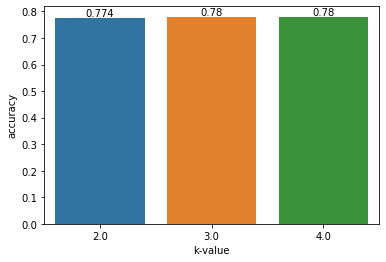

In [25]:
ax = sns.barplot(x = 'k-value', y = 'accuracy', data=bernoulli_results)
label = ax.bar_label(ax.containers[0])

K-Means Clustering and Random Forest

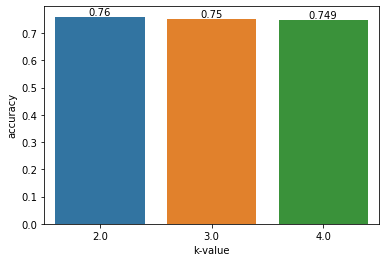

In [26]:
ax = sns.barplot(x = 'k-value', y = 'accuracy', data=rfc_results)
label = ax.bar_label(ax.containers[0])

Based on the results above, for Bernoulli Naive Bayes, it performs best with a k-value of 3 for K-Means Clustering with an accuracy of 78%. However, for Random Forest, it performs best with k-value of 2 with an accuracy of 76%. 

Overall, it can be seen that K-Means Clustering with a k-value of 3 and Bernoulli Naive Bayes classifier produces the highest accuracy of 78%. <br>
Next, we will perform hyperparameter tuning to see if we can improve the accuracy result.

#### Model Prediction with Hyperparameter Tuning

In this section, we will be performing hyperparameter tuning for both the models respectively using the k-value which produced the highest accuracy.

In [27]:
#Tuning K-Means Clustering and Bernoulli Naive Bayes
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#Create a range of alpha values to fit into the Bernoulli Naive Bayes model as a parameter
alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

#Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 1)

#Perform k-means clustering with k-value of 3
algorithm = (KMeans(n_clusters = 3,random_state=1))
algorithm.fit(x_train[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
y_labels_train = algorithm.labels_
y_labels_test = algorithm.predict(x_test[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
x_train['km_clust'] = y_labels_train
x_test['km_clust'] = y_labels_test
    
#Perform classifiction using bernoulli naive bayes using the predefined parameters and GridSearchCV
bnb = BernoulliNB(class_prior=None,fit_prior=True)
bnb_clf = GridSearchCV(bnb, param_grid = alphas, scoring='accuracy', cv = 5)
best_bnb = bnb_clf.fit(x_train, y_train)
y_pred_bnb = best_bnb.predict(x_test)

#Display the best parameter
print('Best params', best_bnb.best_params_)

#Display the classification_report
print(classification_report(y_test, y_pred_bnb, zero_division=0))

#Display the model_accuracy
model_accuracy = "{:.3f}".format(accuracy_score(y_test, y_pred_bnb))
print(model_accuracy)

Best params {'alpha': 10.0}
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       549
           1       0.00      0.00      0.00       156

    accuracy                           0.78       705
   macro avg       0.39      0.50      0.44       705
weighted avg       0.61      0.78      0.68       705

0.779


In [28]:
#Tuning K-Means Clustering and Random Forest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

#Create a range of values for each parameter to fit into the Random Forest model
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25]
min_samples_split = [2, 5, 10, 15]

rf_params_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

#Split the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 5)

#Perform k-means clustering with k-value of 2
algorithm = (KMeans(n_clusters = 2,random_state=5))
algorithm.fit(x_train[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
y_labels_train = algorithm.labels_
y_labels_test = algorithm.predict(x_test[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
x_train['km_clust'] = y_labels_train
x_test['km_clust'] = y_labels_test
    
#Perform classifiction using Random Forest using the predefined parameters and GridSearchCV
rf = RandomForestClassifier(random_state=5)
rf_clf = GridSearchCV(rf, rf_params_grid, scoring='accuracy', cv = 5)
best_rf = rf_clf.fit(x_train, y_train)
y_pred_rf = best_rf.predict(x_test)

#Display the best parameter
print('Best params', best_rf.best_params_)

#Display the classification_report
print(classification_report(y_test, y_pred_rf, zero_division=0))

#Display the model_accuracy
model_accuracy = "{:.3f}".format(accuracy_score(y_test, y_pred_rf))
print(model_accuracy)

Best params {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       538
           1       0.00      0.00      0.00       167

    accuracy                           0.76       705
   macro avg       0.38      0.50      0.43       705
weighted avg       0.58      0.76      0.66       705

0.763


After performing hyperparameter tuning, below are the best accuracy results obtained for both models respectively.

In [29]:
#K-Means Clustering and Bernoulli Naive Bayes after Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,make_scorer,classification_report
from sklearn.cluster import KMeans
from sklearn.naive_bayes import BernoulliNB

k_value_bnb = []
accuracy_value_bnb = []
accuracy_value_tuned = []

#Scaled data
x = df_scaled

#Target variable
y = df_pred['Decision']

#Iterate the prediction for k-value of 2,3,4
for k in range (2,5):
    
    #Split the data into training and test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

    #Perform k-means clustering with k-value of 2,3,4
    algorithm = (KMeans(n_clusters = k,random_state=1))
    algorithm.fit(x_train[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    y_labels_train = algorithm.labels_
    y_labels_test = algorithm.predict(x_test[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    x_train['km_clust'] = y_labels_train
    x_test['km_clust'] = y_labels_test

    #Perform classifiction using bernoulli naive bayes and the best parameters based on the hyperparameter tuning
    model = BernoulliNB(alpha = 10.0)
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    model_accuracy = "{:.3f}".format(accuracy_score(y_test, ypred))
    
    #Print the accuracy of each iteration of k-value
    print('Accuracy for K = %d :' % k, model_accuracy)
    
    #Append the k-value and accuracy into a list
    k_value_bnb.append(k)
    accuracy_value_bnb.append(model_accuracy)
    accuracy_value_tuned.append(model_accuracy)

#Add the list into a dataframe and write to csv
bernoulli_results_tuned = pd.DataFrame(list(zip(k_value_bnb, accuracy_value_bnb)), columns=['k-value','accuracy'])
bernoulli_results_tuned.to_csv('bernoulli-accuracy-tuned.csv', index=False)
bernoulli_results_tuned[['k-value','accuracy']] = bernoulli_results_tuned[['k-value','accuracy']].astype('float64')

Accuracy for K = 2 : 0.779
Accuracy for K = 3 : 0.779
Accuracy for K = 4 : 0.779


In [30]:
#K-Means Clustering and Random Forest after Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,make_scorer,classification_report
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

k_value_rfc = [] 
accuracy_value_rfc = []

#Scaled data
x = df_scaled

#Target variable
y = df_pred['Decision']

#Iterate the prediction for k-value of 2,3,4
for k in range (2,5):
 
    #Split the data into training and test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 5)

    #Perform k-means clustering with k-value of 2,3,4
    algorithm = (KMeans(n_clusters = k,random_state=5))
    algorithm.fit(x_train[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    y_labels_train = algorithm.labels_
    y_labels_test = algorithm.predict(x_test[['Loan_Amount','Monthly_Salary', 'Total_Sum_of_Loan','Total_Income_for_Join_Application']])
    x_train['km_clust'] = y_labels_train
    x_test['km_clust'] = y_labels_test

    #Perform classifiction using random forest and the best parameters based on the hyperparameter tuning
    rfc = RandomForestClassifier(max_depth = 8, min_samples_split = 2, n_estimators = 300, random_state = 5)
    rfc.fit(x_train, y_train)
    ypred = rfc.predict(x_test)
    model_accuracy = "{:.3f}".format(accuracy_score(y_test, ypred))
    
    #Print the accuracy of each iteration of k-value
    print('Accuracy for K = %d :' % k, model_accuracy)
    
    #Append the k-value and accuracy into a list
    k_value_rfc.append(k)
    accuracy_value_rfc.append(model_accuracy)
    accuracy_value_tuned.append(model_accuracy)

#Add the list into a dataframe and write to csv
rfc_results_tuned = pd.DataFrame(list(zip(k_value_rfc, accuracy_value_rfc)), columns=['k-value','accuracy'])
rfc_results_tuned.to_csv('rf-accuracy-tuned.csv', index=False)
rfc_results_tuned[['k-value','accuracy']] = rfc_results_tuned[['k-value','accuracy']].astype('float64')

Accuracy for K = 2 : 0.763
Accuracy for K = 3 : 0.763
Accuracy for K = 4 : 0.763


In [31]:
#Save accuracy results of both tuned model in csv file
tuned_results = pd.DataFrame(list(zip(['Bernoulli Naive Bayes with K=3', 'Random Forest with K=2'], accuracy_value_tuned)), columns=['model','accuracy'])
tuned_results.to_csv('tuned-results.csv', index=False)
tuned_results['accuracy'] = tuned_results['accuracy'].astype('float64')

#### Visualization of the accuracy with different models after hyperparameter tuning

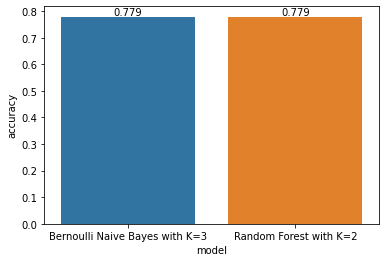

In [32]:
ax = sns.barplot(x = 'model', y = 'accuracy', data=tuned_results)
label = ax.bar_label(ax.containers[0])

#### Accuracy comparison and discussion 

In the first stage of model prediction which is the Initial Model Prediction, we can observe that:

1. For Bernoulli Naive Bayes, it performs best with a k-value of 3 for K-Means Clustering with an accuracy of 78.0%. 
2. For Random Forest, it performs best with k-value of 2 with an accuracy of 76.0%. 

For the first stage, it can be seen that K-Means Clustering with a k-value of 3 and Bernoulli Naive Bayes classifier produces the highest accuracy of 78%.

In the second stage of model prediction which is the Model Prediction with Hyperparameter Tuning, we used the k-value which produced the best accuracy for each of the models. We can observe that:

1. For Bernoulli Naive Bayes, it performs best with alpha value of 10 with an accuracy of 78.0%. 
2. For Random Forest, it performs best with max_depth of 8, min_samples_split of 2 and n_estimators of 300 with an accuracy of 76.3%. 

For the second stage, it can be seen that Bernoulli Naive Bayes classifier with alpha value of 10 produces the highest accuracy of 78%.

#### Impact of parameter changes to the accuracy

When comparing the first stage and second stage of model prediction, it can be seen that the accuracy of Bernoulli Naive Bayes has remained the same after hyperparameter tuning. However, the accuracy of Random Forest has increased by 0.03% after hyperparameter tuning.

Overall, it can be seen that K-Means Clustering with a k-value of 3 and Bernoulli Naive Bayes classifier with alpha value of 10 produces the highest accuracy of 78%.

####  Recommendation <br>

Based on this study, we have used clustering and classification method to perform prediction. In the future, we should definitely explore the hybrid methods of machine learning and deep learning algorithms in order to improve the accuracy of the model. Moreover, more data should be collected to ensure sufficient amount of data is fitted into the model to refine the quality of the model.

#### Conclusion <br> 

To summarize, we have performed a loan application prediction to determine if one's loan will be approved or rejected based on several attributes of a person. There are five stages of loan application prediction which includes Data Collection, Data Preprocessing, Exploratory Data Analysis, Data Preparation for Model Prediction and Model Prediction. As for the result, we have deduced that Bernoulli Naive Bayes classifier with alpha value of 10 and K-Means Clustering with a k-value of 3 have produced the best result with the highest accuracy of 78%. 